In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
df_nasabah = pd.read_csv(r"./data_baru/new_data.csv")
df_nasabah.head()

,Unnamed: 0,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aging,employment_type,loss_reverse
0,0,15500000.00,15625000.00,29500000.00,24350000.00,2.00,1.00,670.00,0.00,DPK,Retired,0.00
1,1,17500000.00,17708333.33,3000000.00,1600000.00,31.00,3.00,402.00,1.00,DPK,Full-time,17708333.33
2,2,17500000.00,14833333.33,13500000.00,9050000.00,0.00,0.00,505.00,0.00,Lancar,Full-time,0.00
3,3,15500000.00,15291666.67,10500000.00,8350000.00,64.00,5.00,508.00,1.00,DPK,Retired,15291666.67
4,4,8700000.00,14041666.67,6500000.00,5750000.00,14.00,2.00,371.00,0.00,DPK,Contract,0.00


In [3]:
columns = {}
for i in df_nasabah.columns:
    if df_nasabah[i].dtype == "category" or df_nasabah[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df_nasabah[i])
        df_nasabah[i] = columns[i].transform(df_nasabah[i])

y_ = df_nasabah["loss_reverse"]
df_nasabah.drop("loss_reverse", axis=1, inplace=True)
scale = MinMaxScaler()
y = scale.fit_transform(y_.to_numpy().reshape(-1, 1))
scaler = RobustScaler().fit(df_nasabah[[i for i in df_nasabah.columns if i not in columns]])
X = pd.DataFrame(scaler.transform(df_nasabah[[i for i in df_nasabah.columns if i not in columns]]), columns=df_nasabah[[i for i in df_nasabah.columns if i not in columns]].columns)
for i in columns:
    X[i] = df_nasabah[i]
X.head(5)

,Unnamed: 0,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aging,employment_type
0,-1.00,0.00,0.19,1.24,1.43,-0.80,-0.60,1.59,-1.00,0,5
1,-1.00,0.27,0.98,-0.88,-0.88,-0.41,-0.20,0.37,0.00,0,1
2,-1.00,0.27,-0.11,-0.04,-0.12,-0.83,-0.80,0.84,-1.00,3,1
3,-1.00,0.00,0.06,-0.28,-0.19,0.03,0.20,0.85,0.00,0,5
4,-1.00,-0.91,-0.41,-0.60,-0.46,-0.64,-0.40,0.22,-1.00,0,0


In [4]:
df2 = X.drop(["Unnamed: 0"], axis=1)


In [5]:
X = df2
y = pd.Series(y.ravel())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [00:22<00:00,  1.85it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 10
[LightGBM] [Info] Start training from score 0.119863


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
NuSVR,1.00,1.00,0.00,9.22
DecisionTreeRegressor,1.00,1.00,0.00,0.05
ExtraTreesRegressor,1.00,1.00,0.00,1.32
RandomForestRegressor,1.00,1.00,0.00,3.11
BaggingRegressor,1.00,1.00,0.00,0.33
GradientBoostingRegressor,1.00,1.00,0.00,0.90
ExtraTreeRegressor,1.00,1.00,0.01,0.03
HistGradientBoostingRegressor,1.00,1.00,0.01,0.89
LGBMRegressor,1.00,1.00,0.01,0.12


In [6]:
def evaluate_performa(X_test, y_test, model1, model2, model3, model4, model5, model6):
    rate = [0, 0, 0, 0, 0, 0]
    #difference = [0, 0, 0, 0, 0]

    X_test = X_test.reset_index(drop=True)
    for i, _ in X_test.iterrows():
        X = np.array(X_test.iloc[[i]])
        y = np.array(y_test.iloc[[i]])
        difference = [0, 0, 0, 0, 0, 0]
        difference[0] = abs(model1.predict(X) - y[0])
        difference[1] = abs(model2.predict(X) - y[0])
        difference[2] = abs(model3.predict(X) - y[0])
        difference[3] = abs(model4.predict(X) - y[0])
        difference[4] = abs(model5.predict(X) - y[0])
        difference[5] = abs(model6.predict(X) - y[0])
        
        print(difference)

        a = int(np.argmin(difference))
        print(a)
        for i in range(len(difference)):
            if difference[a] == difference[i]:
                rate[i] += 1
    
    a = f"Best model : {rate.index(max(rate))+1}"
    return a, rate

In [7]:
extra = ExtraTreesRegressor()
forest = RandomForestRegressor()
xgb = XGBRegressor()
gradient = GradientBoostingRegressor()
bagging = BaggingRegressor()
tree = DecisionTreeRegressor()

extra.fit(X_train, y_train)
forest.fit(X_train, y_train)
xgb.fit(X_train, y_train)
gradient.fit(X_train, y_train)
bagging.fit(X_train, y_train)
tree.fit(X_train, y_train)

a = evaluate_performa(X_test, y_test, extra, forest, xgb, gradient, bagging, tree)
a

[array([0.]), array([0.]), array([0.00012072], dtype=float32), array([0.00066666]), array([0.]), array([0.])]
0
[array([2.33372229e-06]), array([9.71445147e-17]), array([0.0001352], dtype=float32), array([8.10160597e-06]), array([1.38777878e-17]), array([5.55111512e-17])]
4
[array([0.]), array([0.]), array([0.0005092], dtype=float32), array([0.00111454]), array([0.]), array([0.])]
0
[array([0.00039207]), array([4.20070012e-05]), array([0.00382937], dtype=float32), array([0.00265634]), array([7.00116686e-05]), array([0.])]
5
[array([5.13418903e-05]), array([2.10035006e-05]), array([0.00027992], dtype=float32), array([0.00100883]), array([7.00116686e-05]), array([0.])]
5
[array([7.00116686e-05]), array([1.16686114e-05]), array([0.00043976], dtype=float32), array([0.0005348]), array([2.77555756e-17]), array([0.])]
5
[array([3.2672112e-05]), array([7.46791132e-05]), array([0.00037514], dtype=float32), array([0.00217525]), array([0.]), array([0.])]
4
[array([0.00023104]), array([7.23453909e

('Best model : 6', [229, 229, 5, 15, 521, 745])

In [8]:
name = ["ExtraTreeRegressor", "RandomForest", "XGB", "GradientBoosting", "BaggingRegressor"]
estimators = [extra, forest, xgb, gradient, bagging]
r_square = [r2_score(y_test, i.predict(X_test)) for i in estimators]
mse = [mean_squared_error(y_test, i.predict(X_test)) for i in estimators]
mae = [mean_absolute_error(y_test, i.predict(X_test)) for i in estimators]
rmse = [i ** (1/2) for i in mse]
mape = [mean_absolute_percentage_error(y_test, i.predict(X_test)) for i in estimators]

estimate = pd.DataFrame({
    "name": name,
    "r_square": r_square,
    "mse": mse,
    "mae": mae,
    "rmse": rmse,
    "mape": mape
}
)
estimate

,name,r_square,mse,mae,rmse,mape
0,ExtraTreeRegressor,1.00,0.00,0.00,0.00,14640640095.51
1,RandomForest,1.00,0.00,0.00,0.00,0.00
2,XGB,0.99,0.00,0.00,0.01,127778012106.50
3,GradientBoosting,1.00,0.00,0.00,0.00,461289857420.07
4,BaggingRegressor,1.00,0.00,0.00,0.00,0.00


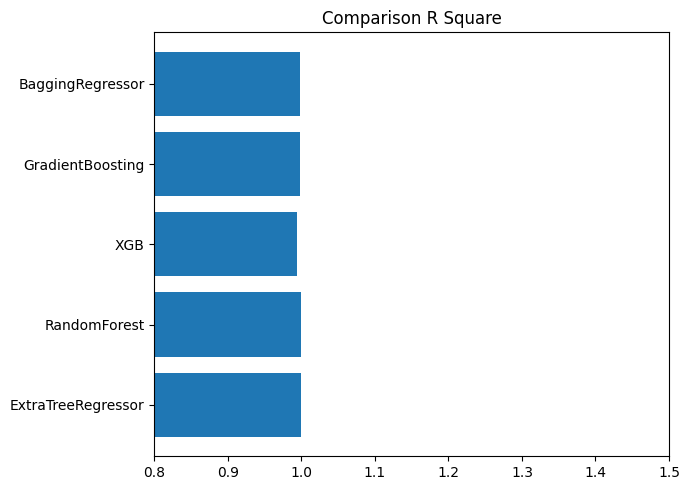

In [9]:
plt.figure(figsize=(7, 5))
plt.barh(estimate.name, estimate.r_square)
plt.title("Comparison R Square")
plt.xlim(0.8, 1.5)
plt.tight_layout()
plt.show()

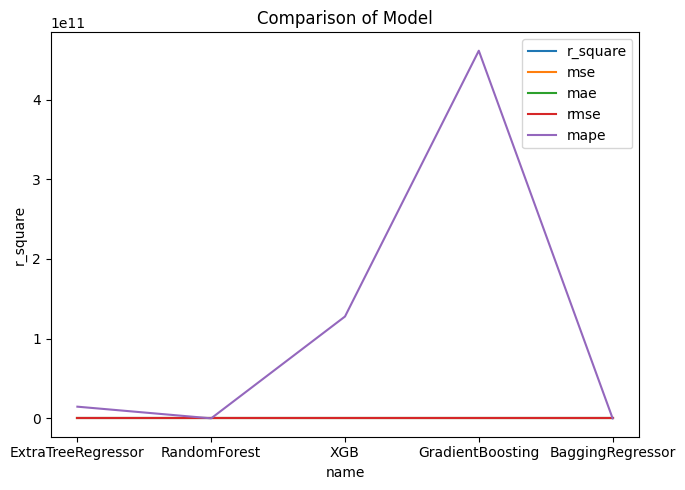

In [10]:
plt.figure(figsize=(7,5))
sns.lineplot(data=estimate, x="name", y="r_square", label="r_square")
sns.lineplot(data=estimate, x="name", y="mse", label="mse")
sns.lineplot(data=estimate, x="name", y="mae", label="mae")
sns.lineplot(data=estimate, x="name", y="rmse", label="rmse")
sns.lineplot(data=estimate, x="name", y="mape", label="mape")
plt.legend()
plt.title("Comparison of Model")
plt.tight_layout()